# 4 Pre-Processing and Training Data

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import graphviz

# Load Data

In [2]:
datascientist_data = pd.read_csv('raw_data/datascientist_data_step3_features.csv')

In [3]:
datascientist_data.head()

,Job Title,Rating,Company Name,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Location City,Location State,Est_Salary
0,Data Scientist,3.500000,Hopper,"Montreal, Canada",2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,0,New York,NY,146.0
1,Data Scientist,4.500000,Noom US,"New York, NY",2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,0,New York,NY,146.0
2,DATA SCIENCE MANAGER,3.283576,Decode_M,"New York, NY",1976,Unknown,-1,Unknown,Unknown / Non-Applicable,-1,1,New York,NY,146.0
3,Data Analyst,3.400000,Sapphire Digital,"Lyndhurst, NJ",2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",0,Lyndhurst,NJ,146.0
4,DIRECTOR,3.400000,United Entertainment Group,"New York, NY",2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",0,New York,NY,146.0


I use pandas function pd.get_dummies for my categorical variable. pd.get_dummies creates a new dataframe which consists of zeros and ones.It converts categorical data into dummy or indicator variables

#### create dummy variable of Rating column

In the step of data processing in machine learning, we often need to prepare our data in specific ways before feeding into a machine learning model. One of the examples is to perform a One-Hot encoding on categorical data by applying pandas get_dummy method on categorical columns

In [4]:
#datascientist_data['Rating'] = datascientist_data['Rating'].replace(-1, mean)
datascientist_data['Rating'] = datascientist_data['Rating'].astype(int).astype('category')

pd.get_dummies(datascientist_data['Rating']).head()

,1,2,3,4,5
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [5]:
datascientist_data['Rating'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

#### create dummy variable of Easy Apply column

In [6]:
datascientist_data['Easy Apply'] = datascientist_data['Easy Apply'].astype('category')
pd.get_dummies(datascientist_data['Easy Apply']).head()

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


Creating X & y variable

In [7]:
X = datascientist_data.drop(['Est_Salary'],axis=1, inplace=False)
y = datascientist_data['Est_Salary']

**Create dummy variable for modelling task**

drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. 
Hence it reduces the correlations created among dummy variables.

In [8]:
def getDummies(data):
    new_data = pd.get_dummies(data=data, drop_first = True)
    return new_data

X = getDummies(X)
X.head()

,Founded,Job Title_ACA,Job Title_ACCOUNTING,Job Title_ADJUNCT FACULTY,Job Title_ADMINISTRATIVE ASSISTANT,Job Title_ADOBE ANALYTICS MANAGER,Job Title_ADVANCED ANALYTICS CONSULTING LEAD,Job Title_AI,Job Title_ANALYTICAL,Job Title_ANALYTICS MANAGER,...,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,Location State_ TX,Location State_ United Kingdom
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Train Test Split

Training and Test Datasets When fitting models, we would like to ensure two things:

We have found the best model (in terms of model parameters). The model is highly likely to generalize i.e. perform well on unseen data.

Purpose of splitting data into Training/testing sets We built our model with the requirement that the model fit the data well. As a side-effect, the model will fit THIS dataset well. What about new data? We wanted the model for predictions, right? One simple solution, leave out some data (for testing) and train the model on the rest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)    
X_train.head()

,Founded,Job Title_ACA,Job Title_ACCOUNTING,Job Title_ADJUNCT FACULTY,Job Title_ADMINISTRATIVE ASSISTANT,Job Title_ADOBE ANALYTICS MANAGER,Job Title_ADVANCED ANALYTICS CONSULTING LEAD,Job Title_AI,Job Title_ANALYTICAL,Job Title_ANALYTICS MANAGER,...,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,Location State_ TX,Location State_ United Kingdom
3485,1983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1456,1983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2912,2014,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1081,1976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
568,1979,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
X_train.shape, X_test.shape

((3127, 3678), (782, 3678))

In [11]:
y_train.shape,y_test.shape

((3127,), (782,))

A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say our best guess is the average salary

In [12]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

108.13383434601855

sklearn's DummyRegressor easily does the same task

In [13]:
#Fit the dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[108.13383435]])

# Matrics

Different performance metrics are used to evaluate different Machine Learning Algorithms.

### Random Forest

In [14]:
#create randomforrest Model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([108.13383435, 108.13383435, 108.13383435, 108.13383435,
       108.13383435])

#### Mean Absolute Error

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)#y_pred
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 24.36


In [17]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    predction -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [18]:
mae(y_test,predictions )

24.358122938640342

#### Mean absolute percentage Accuracy (MAPE)

In [19]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy (MAPE):', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy (MAPE): 74.69 %.
Mean absolute percentage error (MAPE): 25.31 %.


#### Mean squared error

In [20]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,predictions)

print(MSE)

1008.6553925494134


To convert this back to our measurement space, we often take the square root, to form the root mean square error:

In [21]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 31.759335518071115


### Important Feature selection

In [22]:
featuredata = rf.feature_importances_
X_col_list =  X.columns.to_list()

In [23]:
featureDf = {'ColLabel' : X_col_list,
            'FeatureImp' : featuredata }
featureDf = pd.DataFrame(featureDf) 
featureDf =  featureDf.sort_values(by='FeatureImp', ascending=False).head(25)
featureDf # Save

,ColLabel,FeatureImp
3668,Location State_ CA,0.164717
3673,Location State_ NY,0.093677
3625,Location City_San Diego,0.055177
0,Founded,0.042062
3572,Location City_Los Angeles,0.016858
132,Job Title_Data Scientist,0.016055
130,Job Title_Data Analyst,0.011108
131,Job Title_Data Engineer,0.010649
3489,Location City_Austin,0.008466
3504,Location City_Burbank,0.007978


After doing the feature selection get to know salary is more dependent on Location state,location city and job title

### RF : Graph of True vs Predicted for Avg Salary

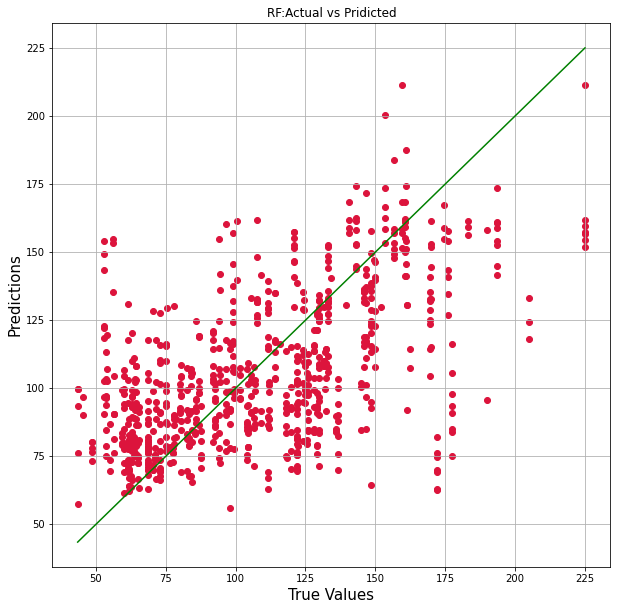

In [24]:
p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.plot([p1, p2],  [p1, p2], 'g-')
plt.title('RF:Actual vs Pridicted')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.grid()
plt.show()

#### Residual plot actual vs Predicted

In [25]:
residuals = y_test-predictions


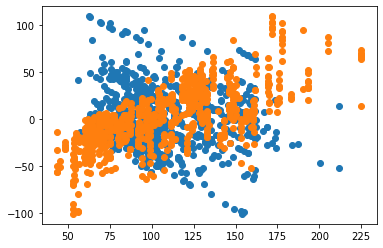

In [26]:
plt.scatter(predictions, residuals)
plt.scatter(y_test,residuals)
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


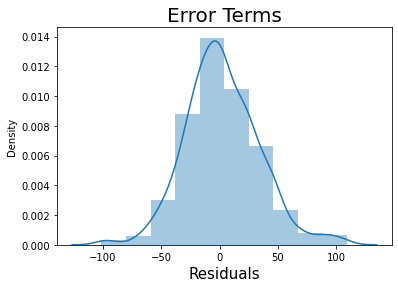

In [27]:
sns.distplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

#REFLECTION:
Above graph indicates density is mostly concentrated at zero residual. i.e. Majority of prediction is approximatly around Actual test data. However somme of the prediction has much more variation as compared to actual value. 

In [28]:
Col_list = featureDf.ColLabel.to_list()
FinalDf = X[Col_list]
FinalDf['Est_Salary']  = datascientist_data['Est_Salary']
#FinalDf2 = X.copy()
#FinalDf2['Est_Salary']  = datascientist_data['Est_Salary']
FinalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Location State_ CA                        3909 non-null   uint8  
 1   Location State_ NY                        3909 non-null   uint8  
 2   Location City_San Diego                   3909 non-null   uint8  
 3   Founded                                   3909 non-null   int64  
 4   Location City_Los Angeles                 3909 non-null   uint8  
 5   Job Title_Data Scientist                  3909 non-null   uint8  
 6   Job Title_Data Analyst                    3909 non-null   uint8  
 7   Job Title_Data Engineer                   3909 non-null   uint8  
 8   Location City_Austin                      3909 non-null   uint8  
 9   Location City_Burbank                     3909 non-null   uint8  
 10  Type of ownership_Nonprofit Organiza

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
import os
datapath = 'raw_data'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [30]:
datapath_datascientist_data = os.path.join(datapath, 'datascientist_data_step4_features.csv')

print(datapath_datascientist_data)
if not os.path.exists(datapath_datascientist_data):
    FinalDf.to_csv(datapath_datascientist_data, index=False)
    
    

raw_data\datascientist_data_step4_features.csv


## Alternate way to output complete dataset

In [31]:
#datapath_datascientist_data = os.path.join(datapath, 'datascientist_data_step4a_features.csv')

#print(datapath_datascientist_data)
#if not os.path.exists(datapath_datascientist_data):
    #FinalDf2.to_csv(datapath_datascientist_data, index=False)
    